In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [2]:
data = pd.read_csv("train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
data.shape

(1000, 12)

Visualizing how each of them are related to each other using seaborn library

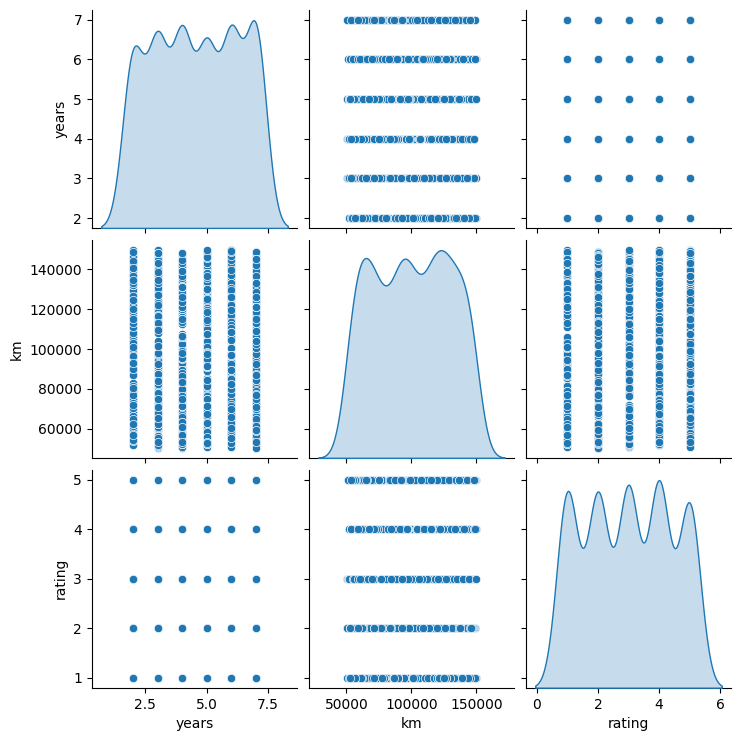

In [4]:
sns.pairplot(data[["years","km","rating"]],diag_kind="kde") #kde=kernel density estimate

In [5]:
#converting to tensor
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [6]:
#shuffling to eliminate bias
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.290000e+02 5.576350e+05 7.984490e+05 3.000000e+00 5.081500e+04
  3.000000e+00 1.000000e+00 8.000000e+00 1.810000e+02 1.150000e+02
  7.800000e+01 4.750015e+05]
 [2.400000e+01 5.191440e+05 8.860240e+05 6.000000e+00 1.396850e+05
  2.000000e+00 2.000000e+00 1.100000e+01 1.630000e+02 5.200000e+01
  1.210000e+02 1.402165e+05]
 [3.540000e+02 5.501990e+05 8.875460e+05 5.000000e+00 1.204770e+05
  2.000000e+00 3.000000e+00 1.500000e+01 1.780000e+02 7.700000e+01
  1.270000e+02 2.358430e+05]
 [8.340000e+02 5.021310e+05 8.073830e+05 5.000000e+00 1.254500e+05
  2.000000e+00 3.000000e+00 1.500000e+01 1.880000e+02 1.190000e+02
  7.700000e+01 1.518365e+05]
 [2.070000e+02 5.754550e+05 8.067480e+05 6.000000e+00 1.365840e+05
  1.000000e+00 8.000000e+00 1.100000e+01 1.820000e+02 1.080000e+02
  7.900000e+01 1.575070e+05]], shape=(5, 12), dtype=float32)


In [7]:
#getting what we need
X = tensor_data[:,3:-1] # because we dont need first three columns
print(X.shape)

(1000, 8)


In [8]:
y= tensor_data[:,-1]
print(y[:5].shape)
y=tf.expand_dims(y,axis=-1)
print(y[:5])

(5,)
tf.Tensor(
[[475001.5]
 [140216.5]
 [235843. ]
 [151836.5]
 [157507. ]], shape=(5, 1), dtype=float32)


In [9]:
TRAIN_RATIO = 0.8
VAL_RATIO=0.1
TEST_RATIO=0.1
SIZE = len(X)

In [10]:
X_train = X[:int(SIZE*TRAIN_RATIO)]
y_train = y[:int(SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [11]:
X_val = X[int(SIZE*TRAIN_RATIO):int(SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(SIZE*TRAIN_RATIO):int(SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [12]:
X_test = X[int(SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [13]:
normalizer = Normalization()
x_normalized = tf.constant([[3,2,4,5,4],
                          [1,3,4,5,3],
                          [3,4,2,4,3]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.7071069 , -1.2247448 ,  0.7071069 ,  0.7071071 ,  1.4142138 ],
       [-1.4142135 ,  0.        ,  0.7071069 ,  0.7071071 , -0.70710665],
       [ 0.7071069 ,  1.2247448 , -1.4142135 , -1.4142132 , -0.70710665]],
      dtype=float32)>

In [14]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9187044 , -1.7224349 ,  0.01230622, -1.6172923 , -1.6409725 ,
         0.72247016,  1.4866391 , -1.2176924 ],
       [ 0.8339905 ,  1.3440764 , -0.6909095 , -1.2671343 , -0.28852275,
        -0.22065057, -1.6019714 ,  0.82117915],
       [ 0.24975888,  0.6812931 , -0.6909095 , -0.91697633,  1.5147434 ,
         0.56528336, -0.3763323 ,  1.1056728 ],
       [ 0.24975888,  0.85288936, -0.6909095 , -0.91697633,  1.5147434 ,
         1.0892394 ,  1.6827413 , -1.265108  ],
       [ 0.8339905 ,  1.2370745 , -1.3941253 ,  0.8338137 , -0.28852275,
         0.77486575,  1.1434602 , -1.1702768 ]], dtype=float32)>

CREATING THE MODEL

In [15]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1)
])
model.summary()

C:\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [16]:
#tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

In [17]:
# Correct way to compile the model
model.compile(optimizer=Adam(), 
              loss=MeanAbsoluteError(), 
              metrics=[RootMeanSquaredError()])  # Metrics must be inside a list

In [18]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 305537.1250 - root_mean_squared_error: 330144.0000 - val_loss: 318316.2500 - val_root_mean_squared_error: 343374.6562
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 309679.9688 - root_mean_squared_error: 333191.8125 - val_loss: 318234.1250 - val_root_mean_squared_error: 343298.7812
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 303693.9062 - root_mean_squared_error: 330786.7812 - val_loss: 317876.3750 - val_root_mean_squared_error: 342969.6250
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 306259.0625 - root_mean_squared_error: 330723.5938 - val_loss: 316792.2812 - val_root_mean_squared_error: 341971.1250
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 305113.7500 - root_mean_squared_error: 329823.9062 - val_loss: 314204.5312 - val_root_mean_squared_error: 339598.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299993.2812 - root_mean_squared_error: 325200.2500 - val

In [19]:
history.history

{'loss': [307337.1875,
  307301.84375,
  307115.625,
  306464.59375,
  304748.46875,
  300992.34375,
  293794.625,
  281442.1875,
  261762.859375,
  232956.1875,
  195798.59375,
  155226.15625,
  118241.7734375,
  89582.7265625,
  71878.796875,
  61206.6640625,
  53142.26171875,
  47603.96875,
  44309.03515625,
  42031.546875,
  40637.41796875,
  39695.0859375,
  39140.71875,
  38794.8671875,
  38450.7890625,
  38222.17578125,
  37952.640625,
  37727.6484375,
  37510.98828125,
  37339.93359375,
  37128.8515625,
  36936.44921875,
  36819.05078125,
  36753.79296875,
  36496.109375,
  36412.796875,
  36314.203125,
  36144.1015625,
  36115.125,
  35970.62109375,
  35902.57421875,
  35966.8515625,
  35778.703125,
  35719.84375,
  35621.31640625,
  35763.9765625,
  35511.609375,
  35355.3203125,
  35278.2109375,
  35181.61328125,
  35237.171875,
  35147.921875,
  35344.66015625,
  35213.67578125,
  35014.41796875,
  34959.6640625,
  34849.10546875,
  34837.6875,
  34848.3125,
  34624.390625,

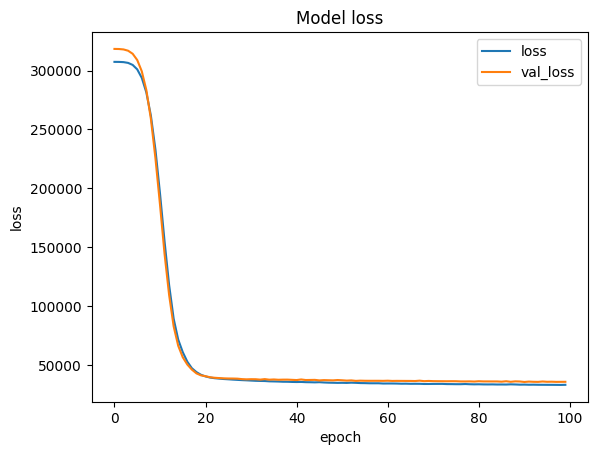

In [20]:
#plotting using matplotlib
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss","val_loss"])
plt.show()

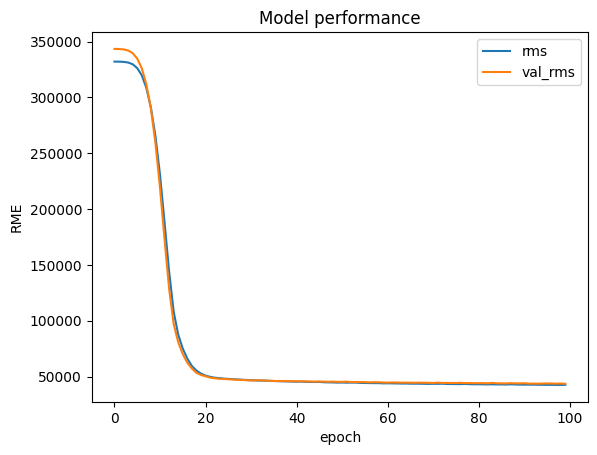

In [21]:
#plotting using matplotlib
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title("Model performance")
plt.ylabel("RME")
plt.xlabel("epoch")
plt.legend(["rms","val_rms"])
plt.show()

In [22]:
model.evaluate(X_val,y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36598.7656 - root_mean_squared_error: 44354.1016 


[36088.4921875, 43530.16015625]

In [23]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41688.7070 - root_mean_squared_error: 49574.0430 


[42957.98046875, 51702.8828125]

PREDICTING THE VALUES

In [24]:
y_pred = list(model.predict(X_test)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [25]:
y_true = list(y_test[:,0].numpy())

In [26]:
model.predict(tf.expand_dims(X_test[0],axis=0))
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[463339.5, 210843.77, 462165.94, 128685.27, 133498.27, 189913.55, 426152.3, 233914.11, 388205.12, 388805.38, 420037.1, 145988.16, 368558.12, 257479.23, 502792.94, 215481.58, 461924.88, 202162.36, 275176.5, 296216.72, 432959.3, 225892.28, 133580.39, 482650.62, 259452.27, 301412.8, 244697.77, 300050.34, 301320.56, 232147.42, 397362.94, 452130.44, 524337.25, 81638.99, 313939.06, 273064.16, 337360.44, 449800.44, 377464.84, 508644.0, 371461.0, 494924.12, 207440.55, 387821.3, 246120.36, 163734.89, 463703.2, 159230.36, 165602.12, 383488.88, 260197.64, 219673.61, 521751.88, 206758.11, 250948.78, 359099.12, 512732.12, 265922.34, 149000.34, 151866.08, 197336.5, 386065.25, 267998.22, 494474.97, 159271.11, 149677.36, 415258.4, 133687.67, 489997.6, 204144.98, 179975.66, 271638.0, 409240.8, 352308.88, 312783.62, 195262.3, 212467.02, 367833.72, 155993.2, 452744.78, 335161.8, 283024.72, 227038.2, 462169.22, 181033.14, 332676.44, 242214.77, 264639.3, 499383.25, 356

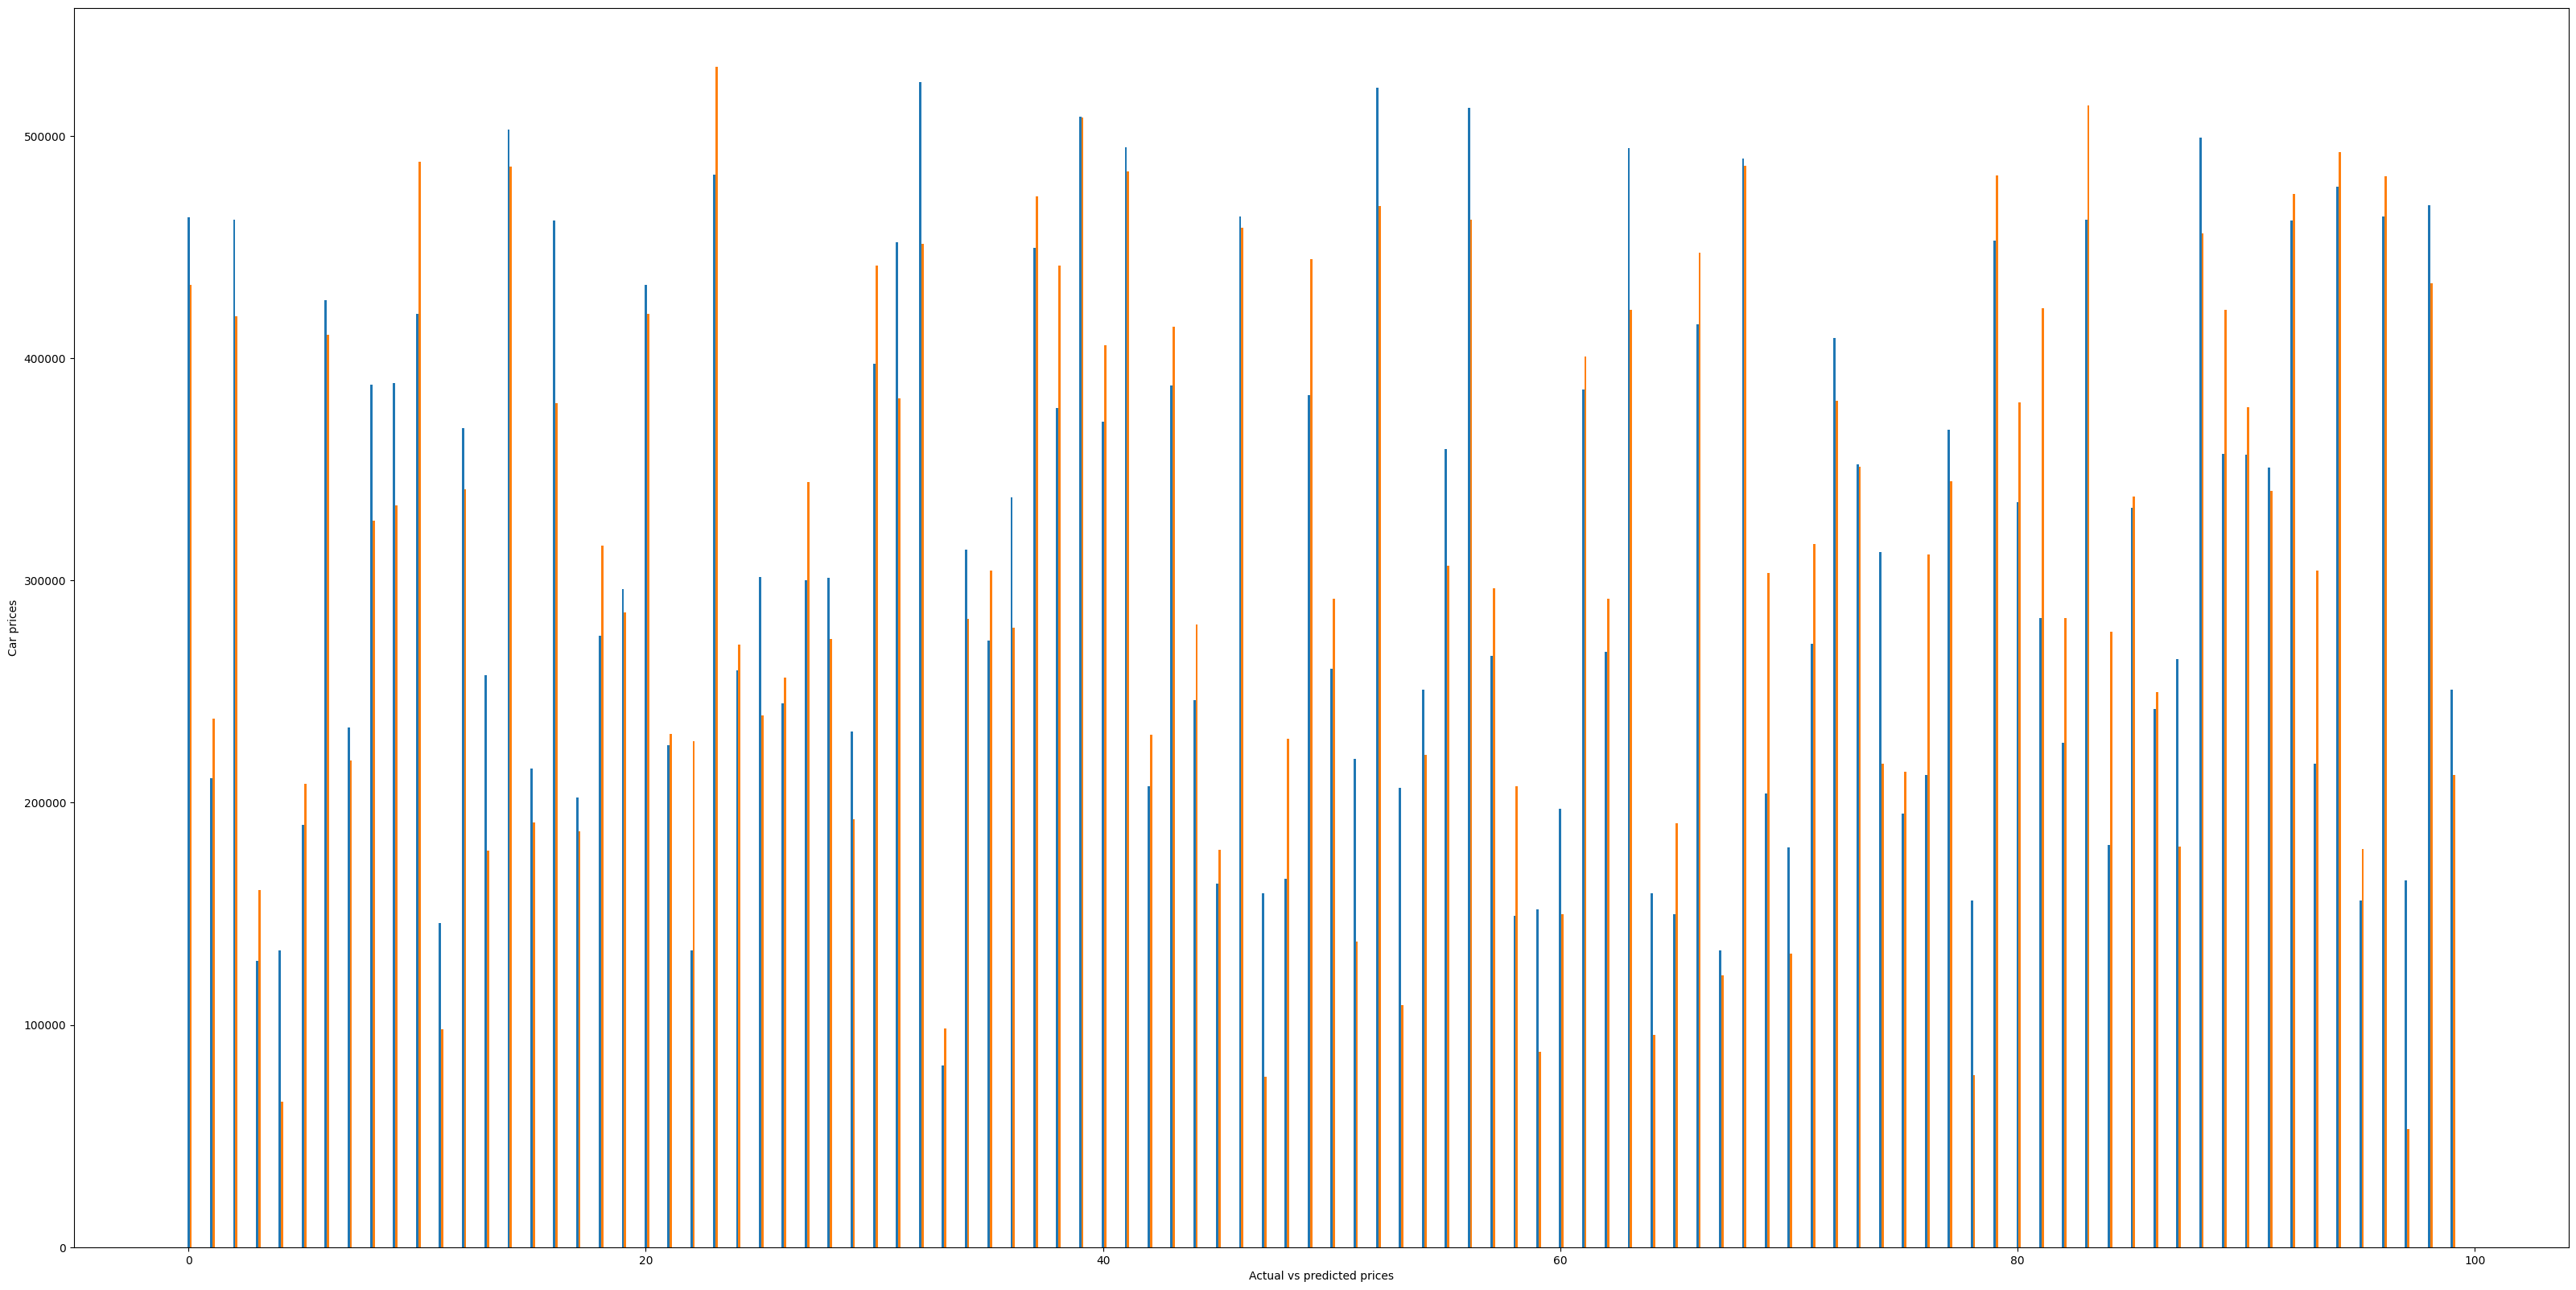

In [27]:
#plotting to check predicted vs actual
ind = np.arange(100)

plt.figure(figsize=(40,20))
width = 0.1

plt.bar(ind,y_pred,width,label="Predicted")
plt.bar(ind+width,y_true,width,label="Actual car price")

plt.xlabel('Actual vs predicted prices')
plt.ylabel('Car prices')

plt.show()